In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Dataset uploading - insert your path to dataset before BigSolDB.csv in between quotes
data = pd.read_csv('BigSolDB.csv')

In [4]:
print('Data rows number in the dataset: ', data.shape[0])

Data rows number in the dataset:  54273


In [5]:
# Numbers of data rows for the top of the most described unique compounds| in the dataset
# specify required number of rows to present as a slilce
data['SMILES'].value_counts().iloc[:30]

CN1CCN(C2=Nc3cc(Cl)ccc3Nc3ccccc32)CC1                                                                   300
O=C(O)c1ccccc1                                                                                          278
N#CCc1ccc([N+](=O)[O-])cc1                                                                              245
O=C1NC(=O)c2cc([N+](=O)[O-])ccc21                                                                       239
On1nnc2ccccc21                                                                                          236
Cc1ccccc1S(N)(=O)=O                                                                                     230
Cc1cc(C(=O)O)ccc1[N+](=O)[O-]                                                                           224
COC(=O)C(C)(C)N=NC(C)(C)C(=O)OC                                                                         215
Cc1ccc(N)c([N+](=O)[O-])c1                                                                              214
Cn1c(=O)c2c(ncn2CC2OCCO2)n(C

In [6]:
print('Number of unique smiles in the dataset: ', data.SMILES.unique().shape[0])

Number of unique smiles in the dataset:  830


In [7]:
# Numbers of data rows for the solubilities in the top of the most popular solvents in the dataset
# specify required number of rows to present as a slilce
data['Solvent'].value_counts().iloc[:30]

ethanol            5543
methanol           4429
isopropanol        4011
ethyl acetate      3848
acetone            3503
n-propanol         3427
water              3168
n-butanol          3062
acetonitrile       2803
toluene            1705
DMF                1549
1,4-dioxane        1264
isobutanol         1183
2-butanone          879
THF                 748
cyclohexane         746
n-pentanol          716
methyl acetate      685
NMP                 627
sec-butanol         627
chloroform          617
n-hexane            588
ethylene glycol     537
DMSO                529
n-octanol           511
dichloromethane     394
acetic acid         372
n-butyl acetate     364
cyclohexanone       328
benzene             280
Name: Solvent, dtype: int64

In [8]:
# Numbers of data rows for the solubilities measured at the most popular temperatures
# specify required number of rows to present as a slilce
data['T,K'].value_counts().iloc[:30]

303.15    4192
313.15    3995
298.15    3988
293.15    3962
308.15    3770
288.15    3339
283.15    3291
318.15    3103
323.15    2593
278.15    2007
328.15     927
333.15     687
273.15     674
295.65     351
285.65     340
300.65     329
290.65     323
305.65     319
310.65     295
298.20     236
308.20     223
303.20     223
280.65     207
313.20     188
338.15     182
298.00     180
293.20     175
318.20     175
343.15     175
323.20     169
Name: T,K, dtype: int64

/Users/cemich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


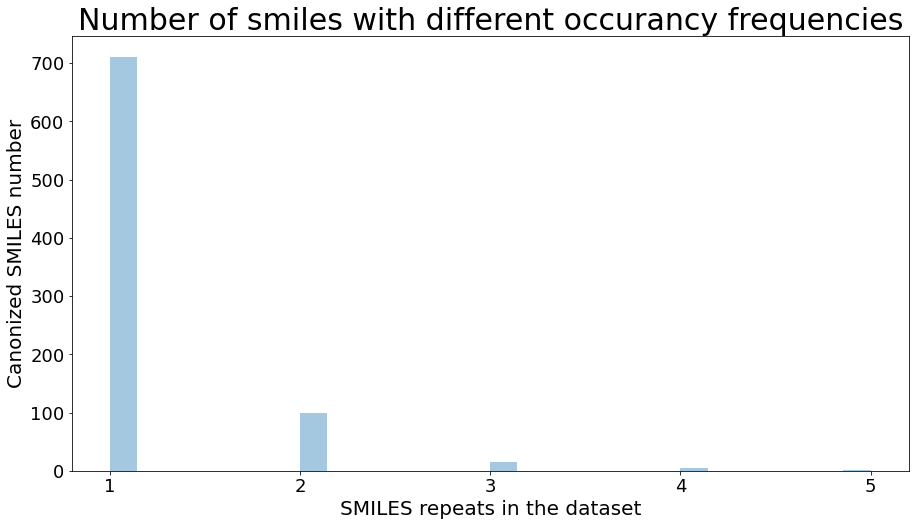

In [9]:
# Barplot represents the number of smiles (axis y) which occures in the dataset with difference frequency (axis x)
f, ax = plt.subplots(figsize=(15, 8))
to_barplot = data.drop_duplicates(['SMILES', 'Source'])
to_barplot = to_barplot['SMILES'].value_counts()
sns.distplot(to_barplot, kde=False)
plt.xticks([1, 2, 3, 4, 5])
plt.tick_params(labelsize = 18)
plt.xlabel('SMILES repeats in the dataset', fontsize=20)
plt.ylabel('Canonized SMILES number', fontsize=20)
plt.title('Number of smiles with different occurancy frequencies', fontsize=30)
plt.show()

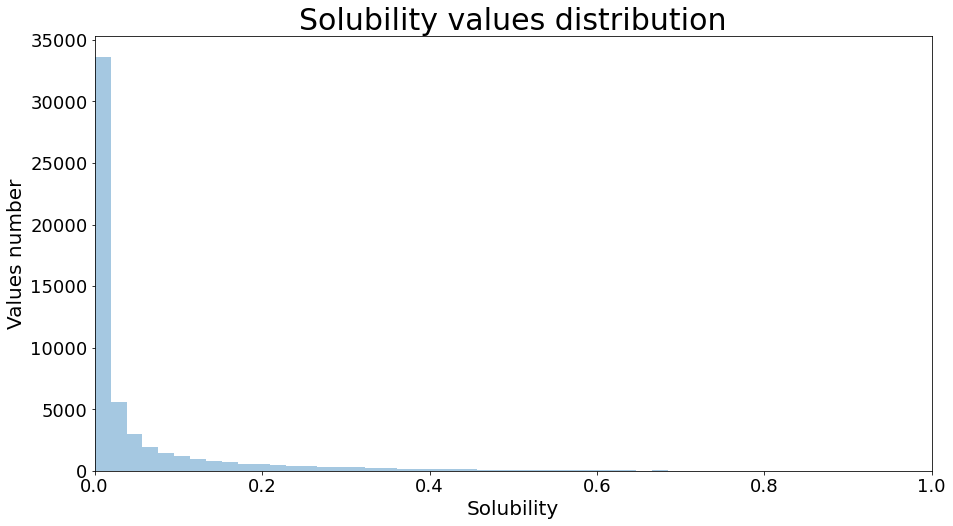

In [10]:
# Solubility values distribution in the dataset
f, ax = plt.subplots(figsize=(15, 8))
sns.distplot(data.Solubility, kde=False)
ax.set_xlim(xmin=0)
plt.tick_params(labelsize = 18)
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.xlabel('Solubility', fontsize=20)
plt.ylabel('Values number', fontsize=20)
plt.title('Solubility values distribution', fontsize=30)
plt.show()

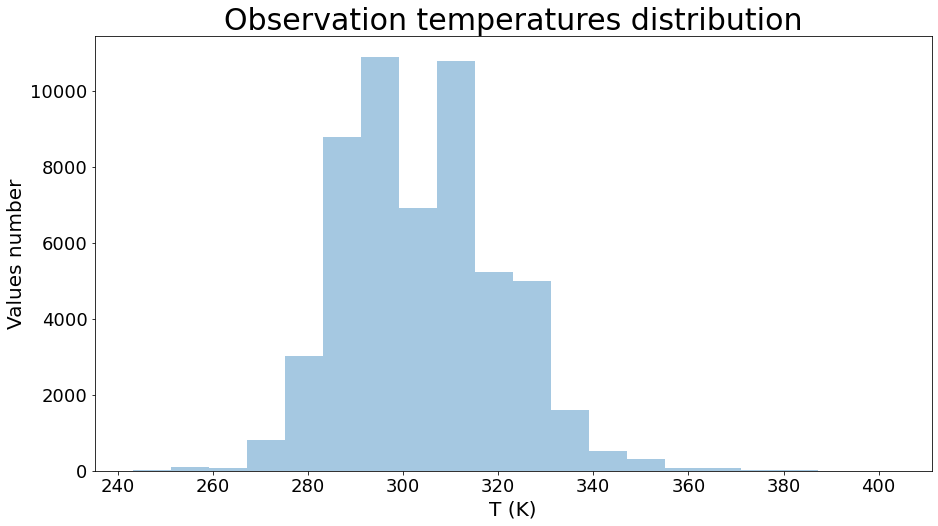

In [11]:
# Distribution of the numbers of observations at diferent temperatures
f, ax = plt.subplots(figsize=(15, 8))
sns.distplot(data['T,K'], kde=False, bins=20)
plt.tick_params(labelsize = 18)
plt.xlabel('T (K)', fontsize=20)
plt.ylabel('Values number', fontsize=20)
plt.title('Observation temperatures distribution', fontsize=30)
plt.show()

/Users/cemich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


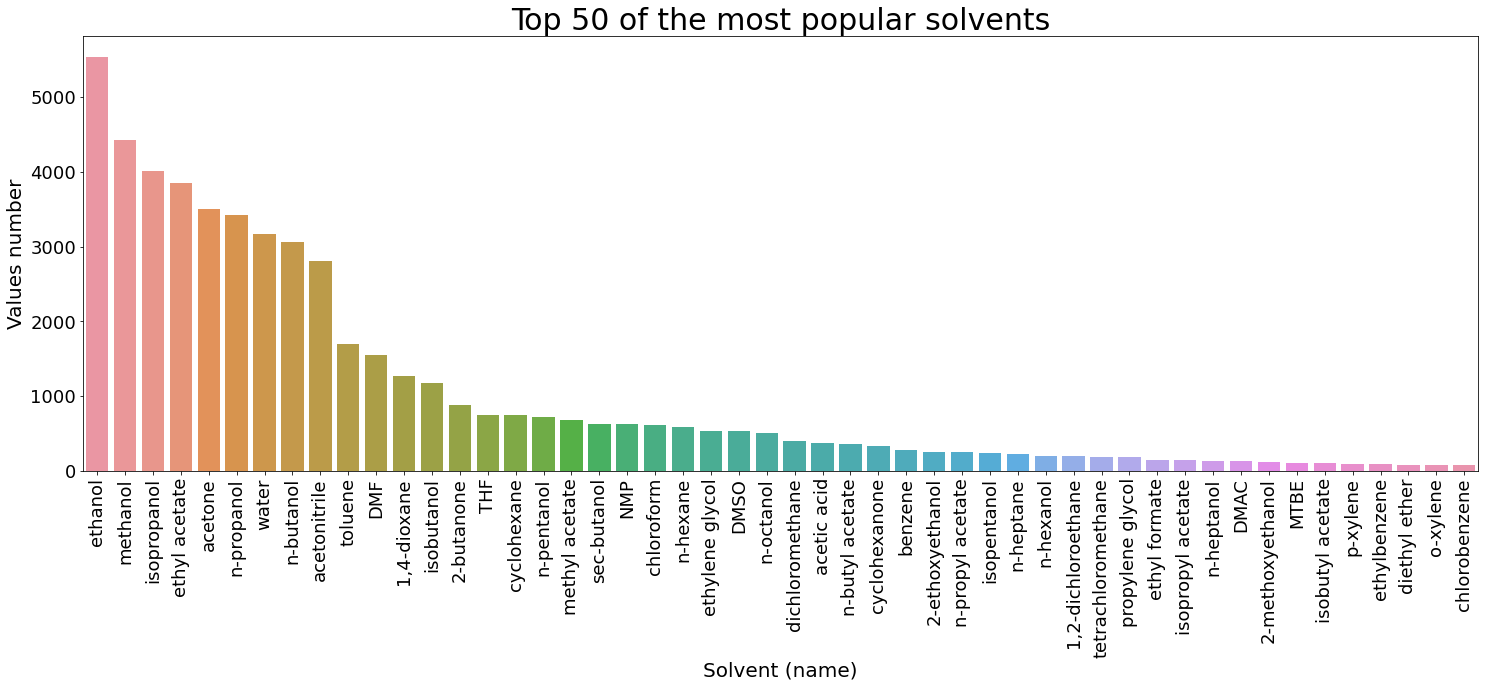

In [12]:
# Numbers of data rows for the top 50 of the most popular solvents
idx = data['Solvent'].value_counts()[:50].index
to_countplot = data[data.Solvent.isin(idx)].Solvent
order = to_countplot.value_counts().index

f, ax = plt.subplots(figsize=(25, 8))
sns.countplot(to_countplot,  order=order)
plt.xticks(rotation=90)
plt.tick_params(labelsize = 18)
plt.xlabel('Solvent (name)', fontsize=20)
plt.ylabel('Values number', fontsize=20)
plt.title('Top 50 of the most popular solvents', fontsize=30)
plt.show()

/Users/cemich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


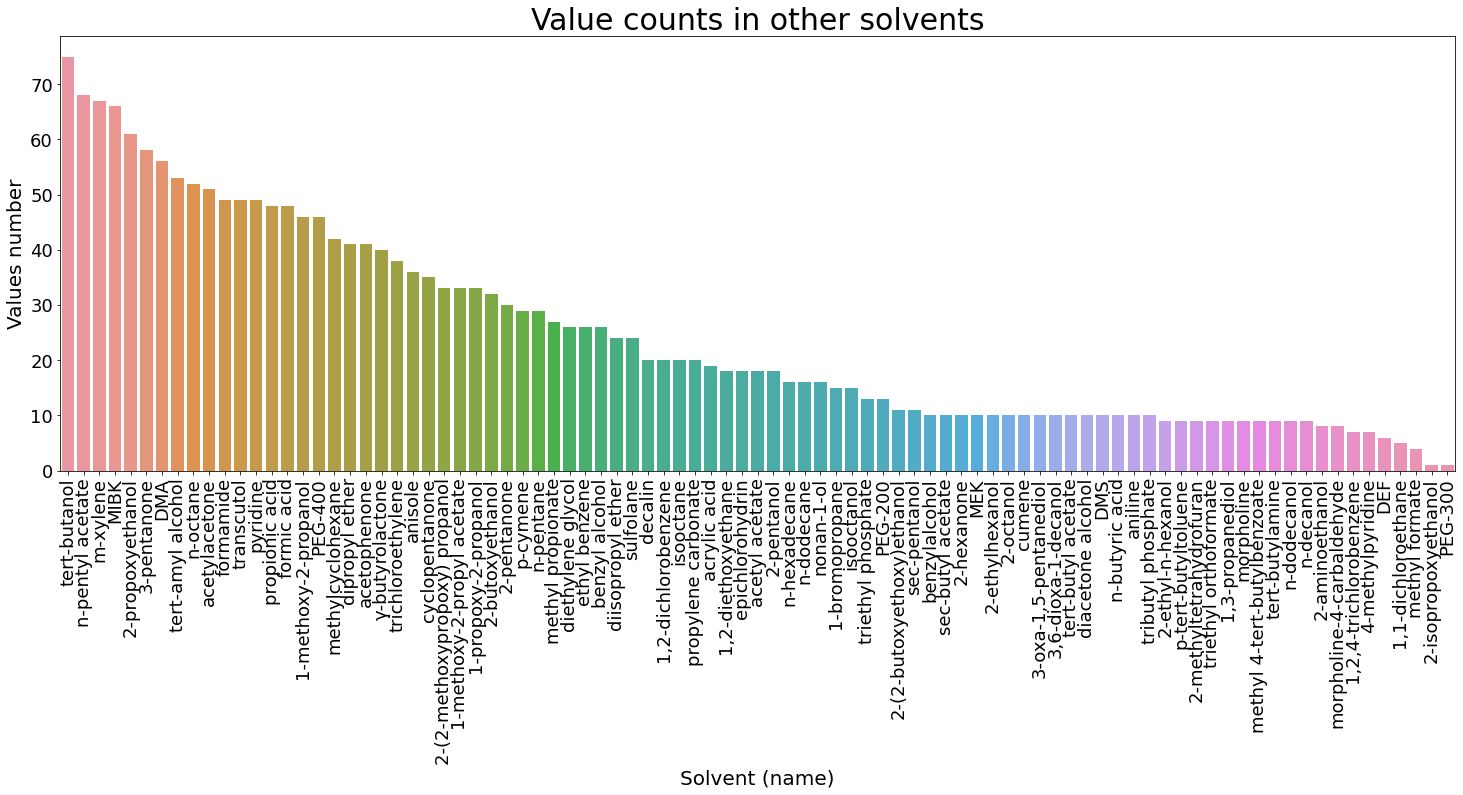

In [25]:
# Numbers of data rows for other solvents
idx = data.Solvent.value_counts()[50:].index
to_countplot = data[data.Solvent.isin(idx)].Solvent
order = to_countplot.value_counts().index

f, ax = plt.subplots(figsize=(25, 8))
sns.countplot(to_countplot,  order=order)
plt.xticks(rotation=90)
plt.tick_params(labelsize = 18)
plt.xlabel('Solvent (name)', fontsize=20)
plt.ylabel('Values number', fontsize=20)
plt.title('Value counts in other solvents', fontsize=30)
plt.show()

/Users/cemich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


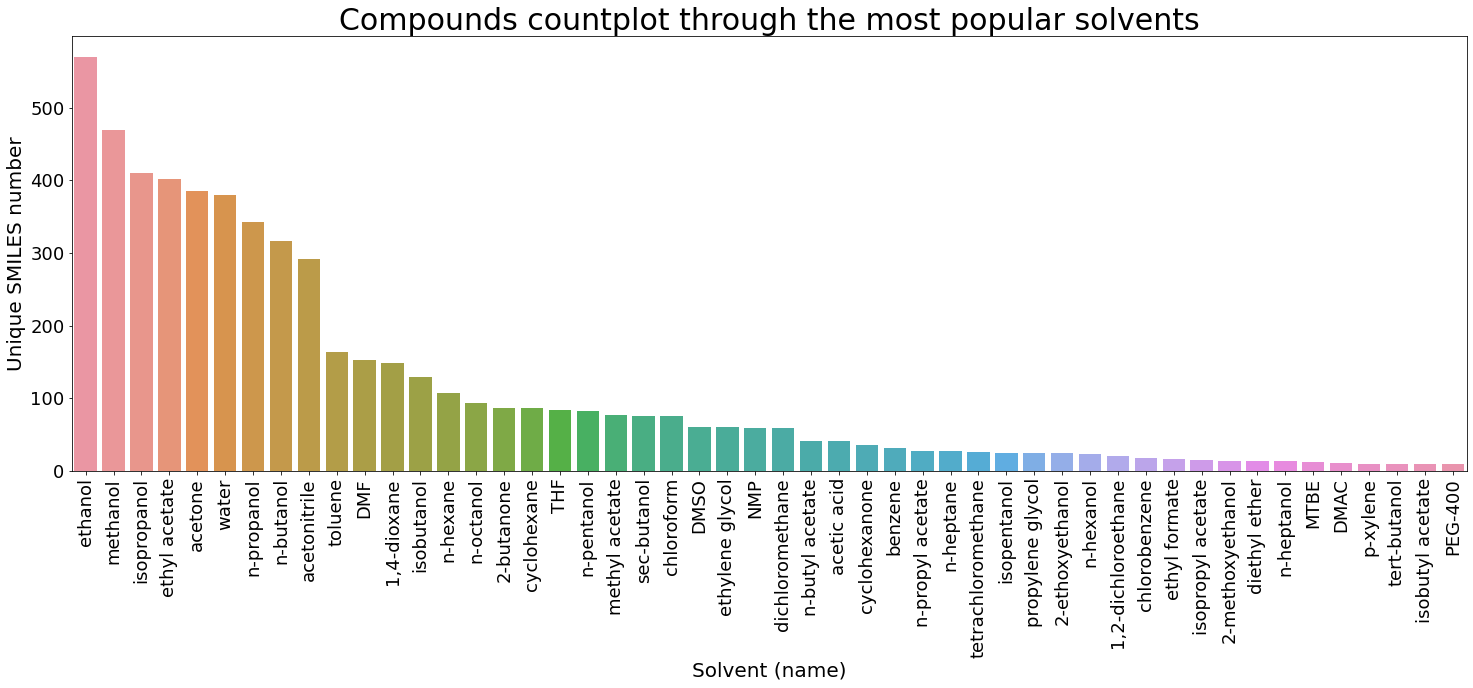

In [27]:
# Number of unique organic compounds whose solubility has been studied in the 50 most popular solvents
solv_smiles = data.drop_duplicates(['SMILES', 'Solvent']).Solvent
idx = solv_smiles.value_counts()[:50].index
to_smiles_countplot = solv_smiles[solv_smiles.isin(idx)]
order = to_smiles_countplot.value_counts()[:50].index

f, ax = plt.subplots(figsize=(25, 8))
sns.countplot(to_smiles_countplot, order=order)
plt.xticks(rotation=90)
plt.tick_params(labelsize = 18)
plt.xlabel('Solvent (name)', fontsize=20)
plt.ylabel('Unique SMILES number', fontsize=20)
plt.title('Compounds countplot through the most popular solvents', fontsize=30)
plt.show()

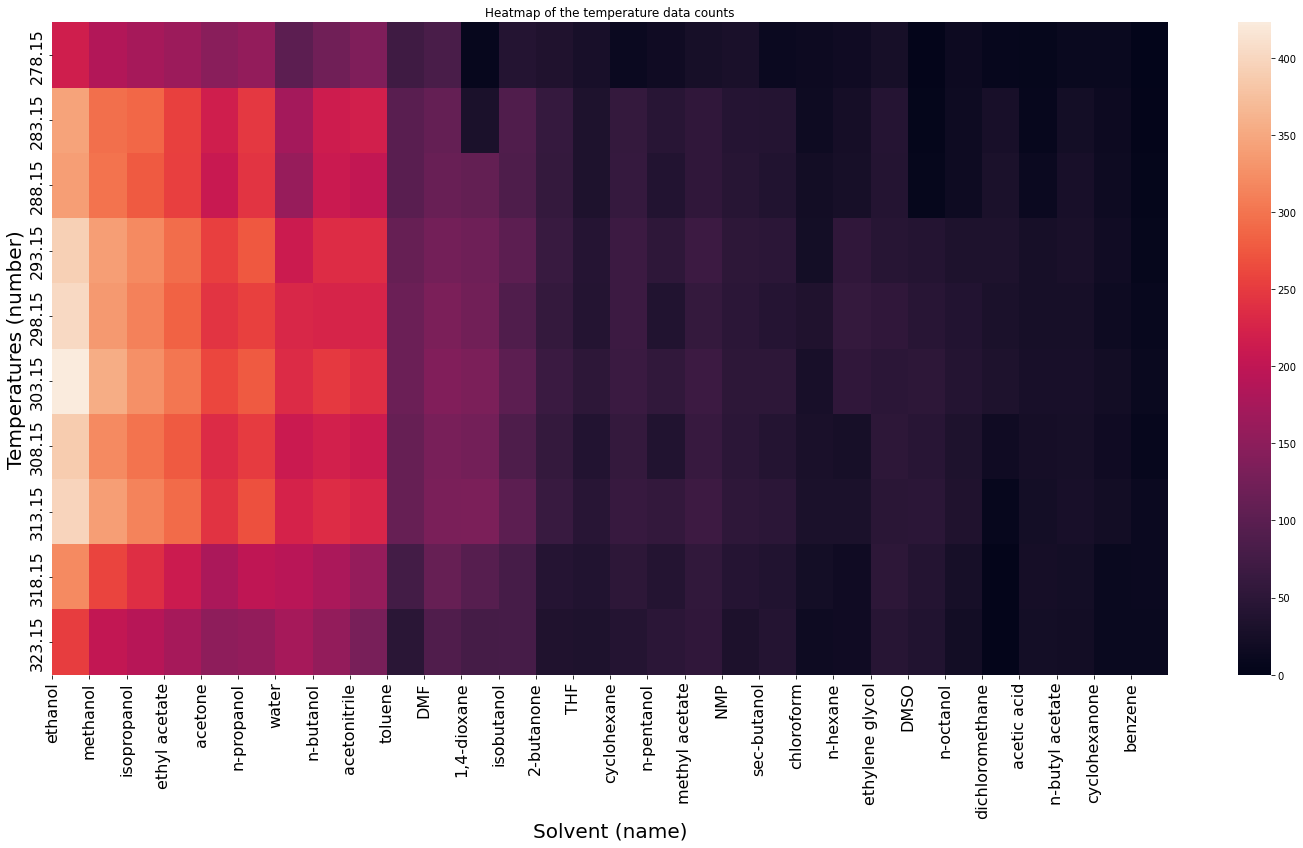

In [30]:
# Heatmap of the number of solubilities
# measured in the top 50 most popular solvents at the most popular temperatures.

columns = data.Solvent.value_counts()[:30].index
index = data['T,K'].value_counts().iloc[:10].index
heats = pd.DataFrame(columns=[columns], index=sorted(index))
heats.fillna(0, inplace=True)
solv_group = data.groupby(by=['Solvent', 'T,K'], as_index=False)

for name, group in solv_group:
    if name[0] in heats.columns and name[1] in heats.index:
        heats.loc[name[1], name[0]] = group.shape[0]

f, ax = plt.subplots(figsize=(25, 12))
sns.heatmap(heats, vmin=0)
ax.set_xticks(np.arange(heats.shape[1]))
ax.set_xticklabels([c[0] for c in heats.columns])           
plt.xticks(rotation=90)
plt.tick_params(labelsize = 16)
plt.xlabel('Solvent (name)', fontsize=20)
plt.ylabel('Temperatures (number)', fontsize=20)
plt.title('Heatmap of the temperature data counts')
plt.show()

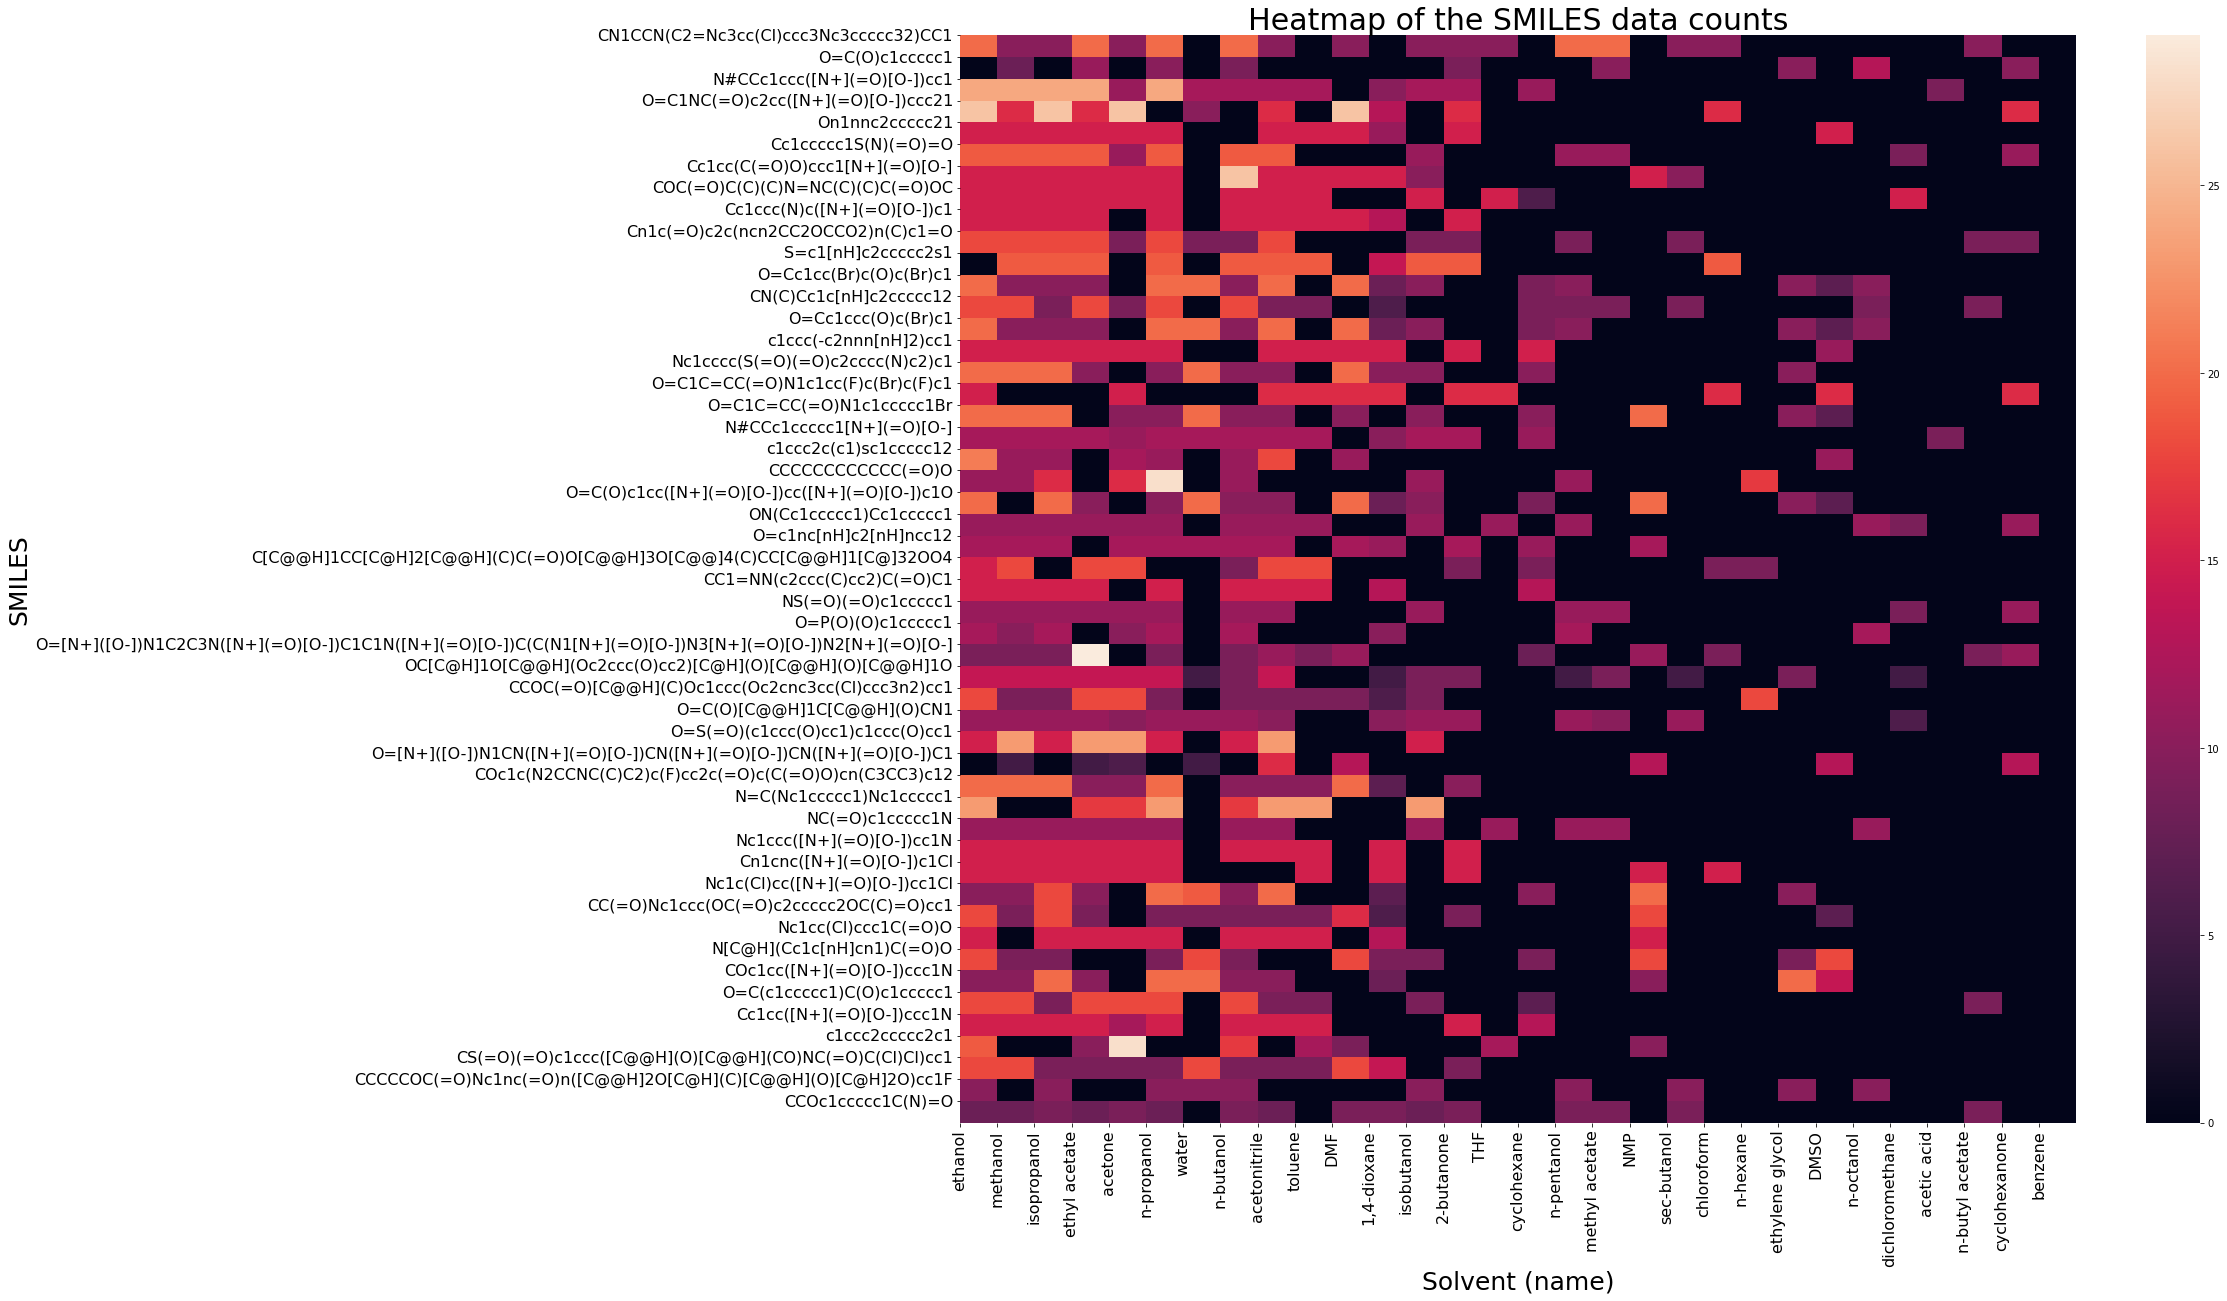

In [31]:
# Heatmap of the number of solubilities 
# measured in the top 50 most popular solvents for the most described compounds.

columns = data.SMILES.value_counts()[:50].index
index = data['Solvent'].value_counts()[:30].index
smiles_heats = pd.DataFrame(columns=[columns], index=index)
smiles_heats.fillna(0, inplace=True)
smiles_group = data.groupby(by=['Solvent', 'SMILES'], as_index=False)

for name, group in smiles_group:
    if name[0] in smiles_heats.index and name[1] in smiles_heats.columns:
        smiles_heats.loc[name[0], name[1]] = group.shape[0]
smiles_heats = smiles_heats.T
smiles_heats = smiles_heats.iloc[:100, :]

f, ax = plt.subplots(figsize=(25, 20))
sns.heatmap(smiles_heats)
ax.set_yticks(np.arange(smiles_heats.shape[0]))
ax.set_yticklabels([c[0] for c in smiles_heats.index]) 
ax.set_xticks(np.arange(smiles_heats.shape[1]))
ax.set_xticklabels([c for c in smiles_heats.columns]) 
plt.xticks(rotation=90)
plt.tick_params(labelsize = 16)
plt.xlabel('Solvent (name)', fontsize=25)
plt.ylabel('SMILES', fontsize=25)
plt.title('Heatmap of the SMILES data counts', fontsize=30)
plt.show()